In [127]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
import pickle
#####
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('spam.csv', encoding='cp1252')

In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
## Steps

# 1. Data Cleaning
# 2. Exploratory Data Analysis
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# renaming the columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [10]:
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
encoder = LabelEncoder()

In [12]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# Missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# Check Duplicate Values
df.duplicated().sum()

403

In [17]:
# Remove Duplicates
df.drop_duplicates(keep='first', inplace=True)

In [18]:
# Check Duplicate
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

## 2. Exploratory Data Analysis

In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

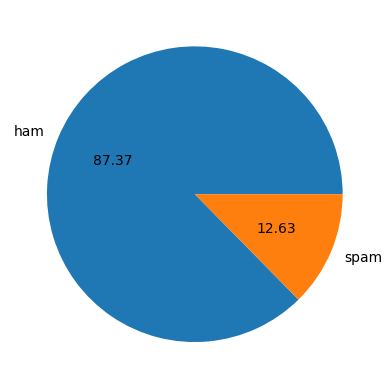

In [21]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
# Data is not balanced

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [25]:
# Numbers of Characters
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [26]:
df['num_characters'] = df['text'].apply(len)

In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
# Number of words
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [29]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [30]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
# Numbers of Sentences
df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [33]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# Ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
# Spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot: xlabel='num_characters', ylabel='Count'>

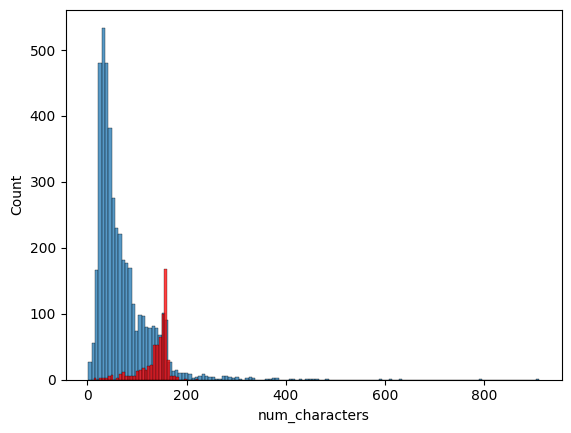

In [38]:
sns.histplot(df[df['target'] == 0]['num_characters']) # Ham
sns.histplot(df[df['target'] == 1]['num_characters'], color= 'red') # Spam

<AxesSubplot: xlabel='num_words', ylabel='Count'>

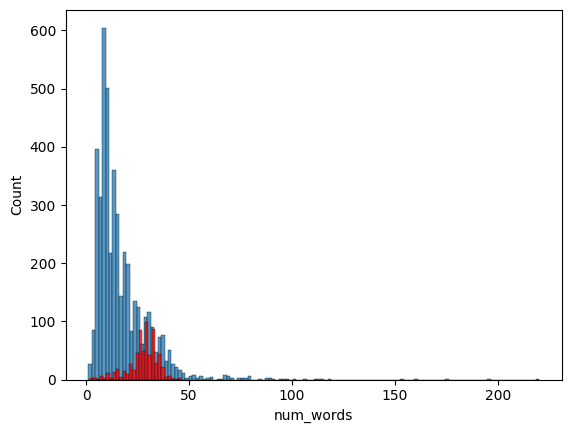

In [39]:
sns.histplot(df[df['target'] == 0]['num_words']) # Ham
sns.histplot(df[df['target'] == 1]['num_words'], color= 'red') # Spam

<AxesSubplot: xlabel='num_sentences', ylabel='Count'>

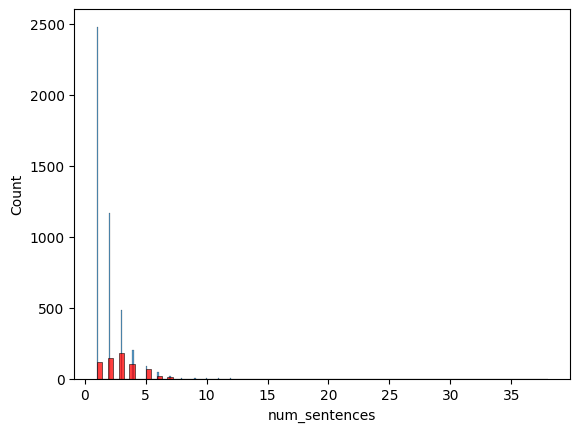

In [40]:
sns.histplot(df[df['target'] == 0]['num_sentences']) # Ham
sns.histplot(df[df['target'] == 1]['num_sentences'], color= 'red') # Spam

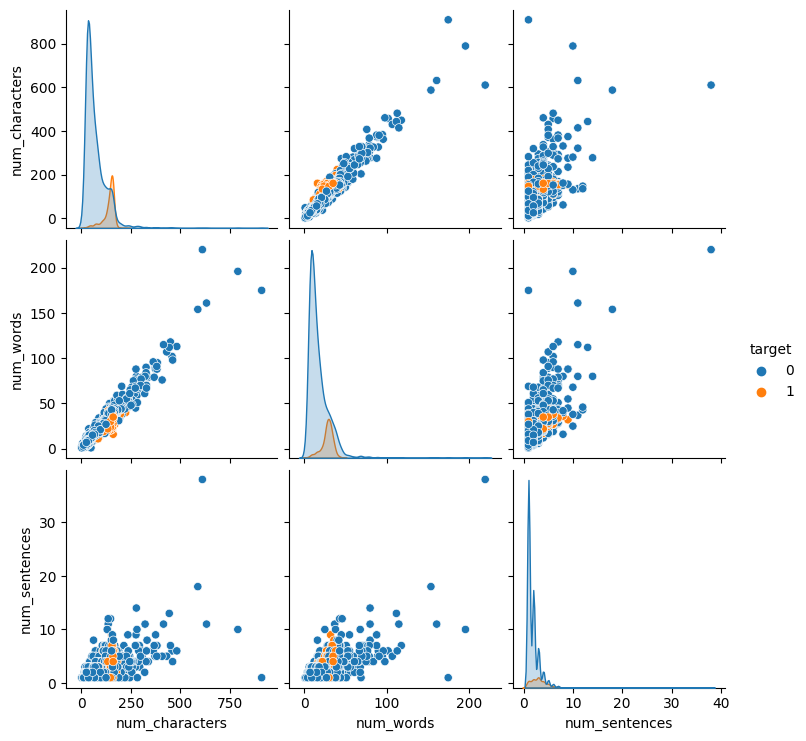

In [41]:
sns.pairplot(df,hue='target')

<AxesSubplot: >

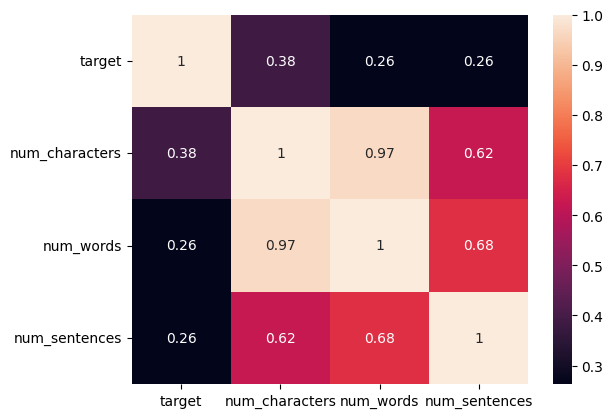

In [42]:
sns.heatmap(df.corr(), annot=True)

## 3. Data Preprocessing

- Lower Case
- Tokenization
- Removing Special Characters
- Removing Stop Words and Punctuation
- Stemming

In [43]:
def transform_text(text):
    text = text.lower()
    return text

In [44]:
transform_text('HI HOW ARE YOU')

'hi how are you'

In [45]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    return text

In [46]:
transform_text('HI HOW ARE YOU')

['hi', 'how', 'are', 'you']

In [47]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [48]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]

    for i in text:
        if i.isalnum():
            y.append(i)
    return y

In [49]:
transform_text('HI HOW ARE YOU IN 20% SEG ^')

['hi', 'how', 'are', 'you', 'in', '20', 'seg']

In [50]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [51]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    return y

In [53]:
transform_text('Did YOU like my presentation on ML?')

['like', 'presentation', 'ml']

In [54]:
ps = PorterStemmer()

In [55]:
ps.stem('dancing')

'danc'

In [56]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [57]:
transform_text('I loved the YT lectures on Machine Learning. How About you?')

'love yt lectur machin learn'

In [58]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [59]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [60]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [61]:
df['transformed_text'] = df['text'].apply(transform_text)

In [62]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [63]:
wc = WordCloud(width=500, height=500, min_font_size=10,background_color='white')

In [64]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

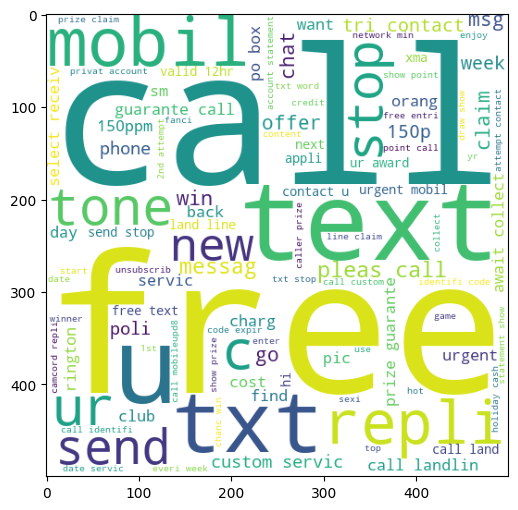

In [65]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

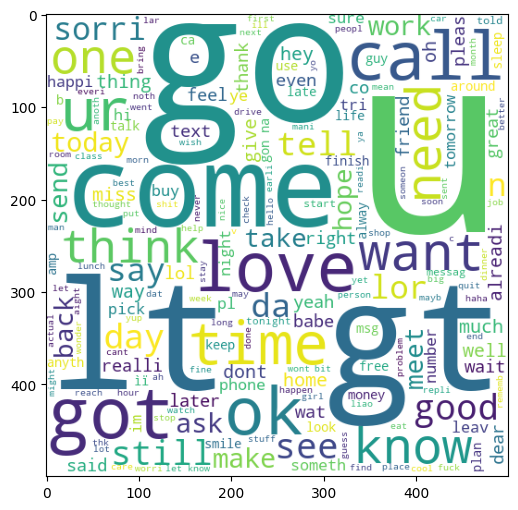

In [66]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [67]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [68]:
df[df['target'] == 1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [69]:
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [70]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [71]:
len(spam_corpus)

9939

In [72]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

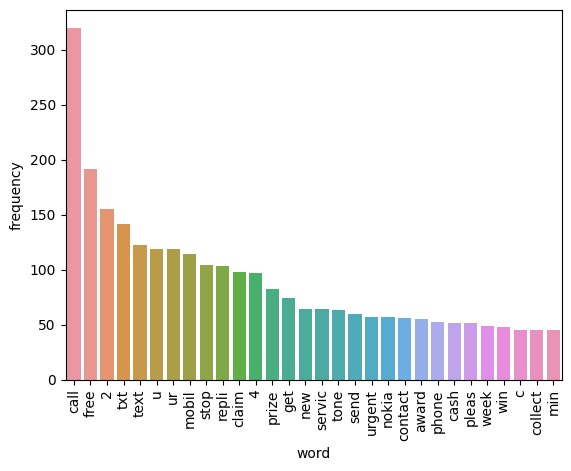

In [73]:
data = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'frequency'])
sns.barplot(x='word', y='frequency', data=data)
plt.xticks(rotation='vertical')
plt.show()

In [74]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [75]:
len(ham_corpus)

35404

In [76]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

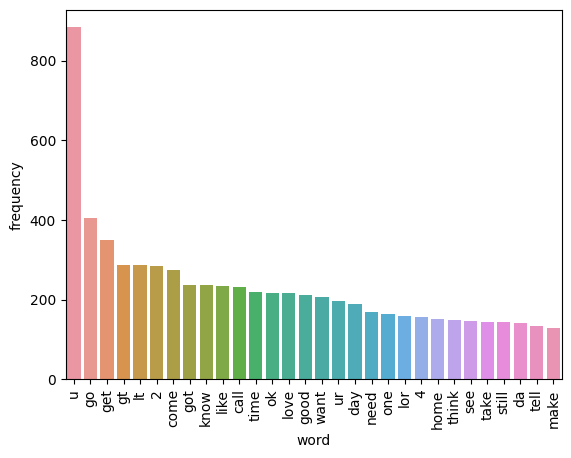

In [77]:
data = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'frequency'])
sns.barplot(x='word', y='frequency', data=data)
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [129]:
cv = CountVectorizer()

In [130]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [131]:
X.shape

(5169, 6708)

In [132]:
y = df['target'].values

In [133]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [135]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [136]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.877498388136686
[[1171  160]
 [  30  190]]
0.5428571428571428


In [137]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9761444229529336
[[1310   21]
 [  16  204]]
0.9066666666666666


In [138]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9658284977433914
[[1326    5]
 [  48  172]]
0.9717514124293786


In [141]:
tfidf = TfidfVectorizer()

In [142]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [143]:
X.shape

(5169, 6708)

In [144]:
y = df['target'].values

In [145]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [147]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8749194068343005
[[1171  160]
 [  34  186]]
0.5375722543352601


In [148]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9542230818826564
[[1331    0]
 [  71  149]]
1.0


In [149]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9658284977433914
[[1326    5]
 [  48  172]]
0.9717514124293786


In [97]:
# tfidf --> MNB

## 5. Evaluation

In [98]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [99]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [100]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [101]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9722759509993553, 0.9682539682539683)

In [103]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9722759509993553
Precision -  0.9682539682539683
For  KN
Accuracy -  0.8884590586718246
Precision -  1.0
For  NB
Accuracy -  0.9542230818826564
Precision -  1.0
For  DT
Accuracy -  0.9342359767891683
Precision -  0.8352272727272727
For  LR
Accuracy -  0.941972920696325
Precision -  0.8869047619047619
For  RF
Accuracy -  0.968407479045777
Precision -  0.9942196531791907
For  AdaBoost
Accuracy -  0.9555125725338491
Precision -  0.9081081081081082
For  BgC
Accuracy -  0.961960025789813
Precision -  0.8888888888888888
For  ETC
Accuracy -  0.970341715022566
Precision -  0.978021978021978
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9426751592356688
For  xgb
Accuracy -  0.9696969696969697
Precision -  0.9261083743842364


In [104]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [105]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.888459,1.000000
2,NB,0.954223,1.000000
5,RF,0.968407,0.994220
8,ETC,0.970342,0.978022
0,SVC,0.972276,0.968254
9,GBDT,0.947776,0.942675
10,xgb,0.969697,0.926108
6,AdaBoost,0.955513,0.908108
7,BgC,0.961960,0.888889
4,LR,0.941973,0.886905


In [106]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [107]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.888459
1,NB,Accuracy,0.954223
2,RF,Accuracy,0.968407
3,ETC,Accuracy,0.970342
4,SVC,Accuracy,0.972276
5,GBDT,Accuracy,0.947776
6,xgb,Accuracy,0.969697
7,AdaBoost,Accuracy,0.955513
8,BgC,Accuracy,0.961960
9,LR,Accuracy,0.941973


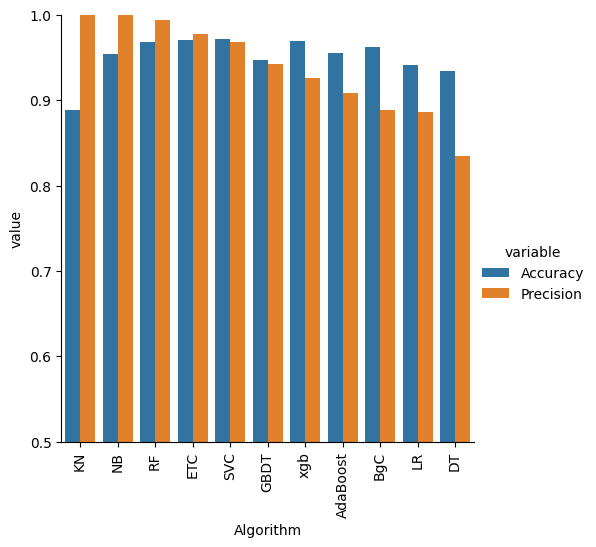

In [108]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## 6. Improvements

### 1. Change the max_features parameter of TfIdf

In [109]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [110]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.888459,1.000000
2,NB,0.954223,1.000000
5,RF,0.968407,0.994220
8,ETC,0.970342,0.978022
0,SVC,0.972276,0.968254
9,GBDT,0.947776,0.942675
10,xgb,0.969697,0.926108
6,AdaBoost,0.955513,0.908108
7,BgC,0.961960,0.888889
4,LR,0.941973,0.886905


In [111]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [112]:
temp_df

,Algorithm,Accuracy_scaling,Precision_scaling
1,KN,0.888459,1.000000
2,NB,0.954223,1.000000
5,RF,0.968407,0.994220
8,ETC,0.970342,0.978022
0,SVC,0.972276,0.968254
9,GBDT,0.947776,0.942675
10,xgb,0.969697,0.926108
6,AdaBoost,0.955513,0.908108
7,BgC,0.961960,0.888889
4,LR,0.941973,0.886905


In [113]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [114]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling
0,KN,0.888459,1.000000,0.888459,1.000000
1,NB,0.954223,1.000000,0.954223,1.000000
2,RF,0.968407,0.994220,0.968407,0.994220
3,ETC,0.970342,0.978022,0.970342,0.978022
4,SVC,0.972276,0.968254,0.972276,0.968254
5,GBDT,0.947776,0.942675,0.947776,0.942675
6,xgb,0.969697,0.926108,0.969697,0.926108
7,AdaBoost,0.955513,0.908108,0.955513,0.908108
8,BgC,0.961960,0.888889,0.961960,0.888889
9,LR,0.941973,0.886905,0.941973,0.886905


In [115]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [116]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,KN,0.888459,1.000000,0.888459,1.000000,0.888459,1.000000
1,NB,0.954223,1.000000,0.954223,1.000000,0.954223,1.000000
2,RF,0.968407,0.994220,0.968407,0.994220,0.968407,0.994220
3,ETC,0.970342,0.978022,0.970342,0.978022,0.970342,0.978022
4,SVC,0.972276,0.968254,0.972276,0.968254,0.972276,0.968254
5,GBDT,0.947776,0.942675,0.947776,0.942675,0.947776,0.942675
6,xgb,0.969697,0.926108,0.969697,0.926108,0.969697,0.926108
7,AdaBoost,0.955513,0.908108,0.955513,0.908108,0.955513,0.908108
8,BgC,0.961960,0.888889,0.961960,0.888889,0.961960,0.888889
9,LR,0.941973,0.886905,0.941973,0.886905,0.941973,0.886905


In [117]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [118]:
temp_df

,Algorithm,Accuracy_num_chars,Precision_num_chars
1,KN,0.888459,1.000000
2,NB,0.954223,1.000000
5,RF,0.968407,0.994220
8,ETC,0.970342,0.978022
0,SVC,0.972276,0.968254
9,GBDT,0.947776,0.942675
10,xgb,0.969697,0.926108
6,AdaBoost,0.955513,0.908108
7,BgC,0.961960,0.888889
4,LR,0.941973,0.886905


In [119]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.888459,1.000000,0.888459,1.000000,0.888459,1.000000,0.888459,1.000000
1,NB,0.954223,1.000000,0.954223,1.000000,0.954223,1.000000,0.954223,1.000000
2,RF,0.968407,0.994220,0.968407,0.994220,0.968407,0.994220,0.968407,0.994220
3,ETC,0.970342,0.978022,0.970342,0.978022,0.970342,0.978022,0.970342,0.978022
4,SVC,0.972276,0.968254,0.972276,0.968254,0.972276,0.968254,0.972276,0.968254
5,GBDT,0.947776,0.942675,0.947776,0.942675,0.947776,0.942675,0.947776,0.942675
6,xgb,0.969697,0.926108,0.969697,0.926108,0.969697,0.926108,0.969697,0.926108
7,AdaBoost,0.955513,0.908108,0.955513,0.908108,0.955513,0.908108,0.955513,0.908108
8,BgC,0.961960,0.888889,0.961960,0.888889,0.961960,0.888889,0.961960,0.888889
9,LR,0.941973,0.886905,0.941973,0.886905,0.941973,0.886905,0.941973,0.886905


In [120]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [121]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [122]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [123]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9813023855577047
Precision 0.9948186528497409


In [124]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [125]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [126]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9800128949065119
Precision 0.9565217391304348


In [150]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

In [140]:
pickle.dump(mnb,open('model.pkl','wb'))